# Definition:
- Related word clustering/classification/regression
- Polysemy, choosing exact meaning of word in the sentences
   - Apple is a tasty fruit."Apple" is not the company in this sentence
- Create a representation of words that capture their meanings, semantic relationships, different types of context used

# Type of Embedding:
- Frequency Based
   - Count Vector
   - TF-IDF Vector
   - Co-Occurrence Vector
- Prediction Based
   - CBOW (Back of Words)
   - Skip-Gram

# 1)Representing Text as Numbers

Take vectors as input.When working with text, the first thing we must do come up with a strategy to convert strings to numbers before we feeding it into a model

We have three strategies:
- One-hot Embedding
- Encode each word into an unique number
- Word Embedding

# - One-Hot Encoding

Sentence:"The cat sat on the mat."

The unique word: the, cat, sat, on, mat

Zero vector with length=vocabulary; One vector in index correspond to the word
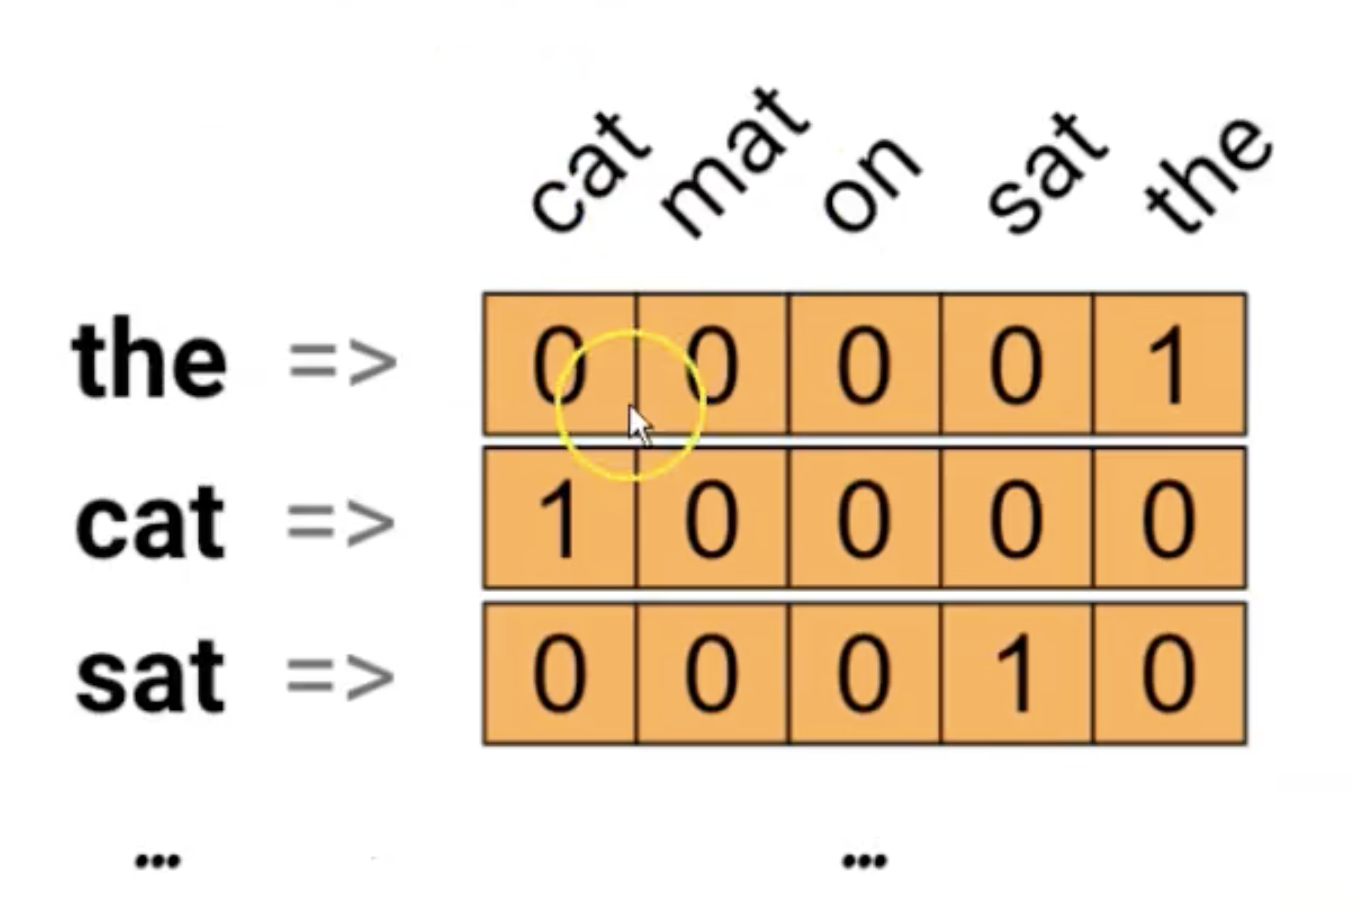


This approach is not efficient. One hot encoded vector is sparse:most index are zero.

# - Encode each word into an unique number

Encode each word with a unique word. 

Integer-encoding method doesn't care about the relationships between words. And it can be challenge for machine to understand.

# - Word Embeddings

Dense representation in which similar words have a similar encoding. An embedding is a dense vector of floating point values, they are **trainable parameters**.

Trainable parameters: weights learned by model during training. 

A higher dimensional embedding, Capture fine-grained relationship between words, but make more data to learn.

A four dimensional embedding: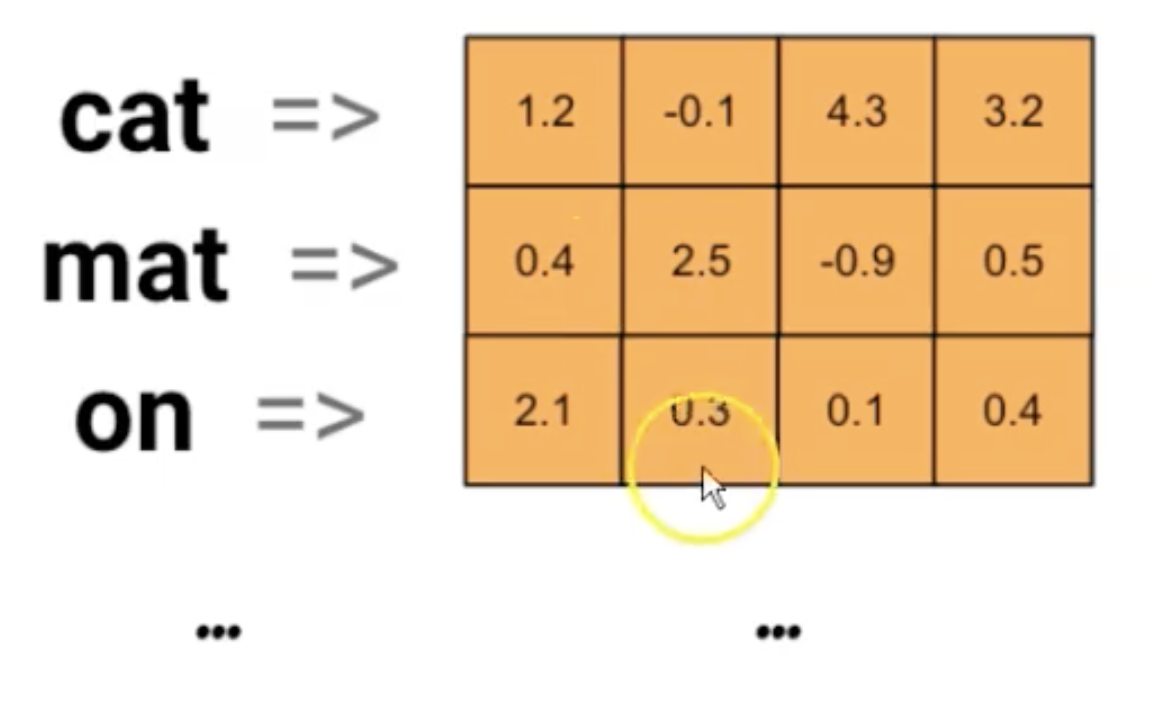

# 2) Train Model for Embeddings

# - Import Python Library

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import pandas as pd
import gensim
from gensim.models import Word2Vec, KeyedVectors

# - Data Preprocessing

In [ ]:
#google pretrained model:https://www.kaggle.com/datasets/rootuser/worldnews-on-reddit


In [4]:
#install kaggle API
! pip install -q kaggle

In [5]:
#create a directory as kaggle
! mkdir -p ~/.kaggle

In [12]:
#copy API key to kaggle directory
! cp  kaggle.json ~/.kaggle

In [13]:
#Disable the API Key
! chmod 600 /root/.kaggle/kaggle.json

In [14]:
#import the dataset
! kaggle datasets download -d rootuser/worldnews-on-reddit

 71% 19.0M/26.6M [00:00<00:00, 67.4MB/s]
100% 26.6M/26.6M [00:00<00:00, 77.0MB/s]


In [15]:
#unzip the dataset
! unzip /content/worldnews-on-reddit

Archive:  /content/worldnews-on-reddit.zip
  inflating: reddit_worldnews_start_to_2016-11-22.csv  


In [16]:
#load datasets
df=pd.read_csv('/content/reddit_worldnews_start_to_2016-11-22.csv')

In [17]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [20]:
df.shape

(509236, 8)

In [18]:
#take the title column
news_title=df['title'].values

In [19]:
news_title

array(['Scores killed in Pakistan clashes',
       'Japan resumes refuelling mission',
       'US presses Egypt on Gaza border', ...,
       'Professor receives Arab Researchers Award',
       'Nigel Farage attacks response to Trump ambassador tweet',
       'Palestinian wielding knife shot dead in West Bank: Israel police'],
      dtype=object)

In [22]:
#tokenization
new_vec=[nltk.word_tokenize(title) for title in news_title]

In [23]:
new_vec[0]

['Scores', 'killed', 'in', 'Pakistan', 'clashes']

# - Build the Model

In [25]:
model=Word2Vec(new_vec, min_count=1,size=32) #text,minimum word count,size of each vector-->every single unique word take into consideration with 32 numbers of space 
#min_count:The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
#size: The number of dimensions of the embeddings and the default is 100.
#window: The maximum distance between a target word and words around the target word. The default window is 5.
#workers: The number of partitions during training and the default workers is 3.
#sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [28]:
model

# - Predictions

In [27]:
#Find the 10 closest words of 'man' in a vector space that we have created
model.wv.most_similar('man')

[('woman', 0.9688421487808228),
 ('girl', 0.9159433245658875),
 ('boy', 0.8996798992156982),
 ('couple', 0.8991376161575317),
 ('teenager', 0.8702247142791748),
 ('mother', 0.8675106763839722),
 ('teacher', 0.8632453680038452),
 ('doctor', 0.8426777124404907),
 ('father', 0.8322235345840454),
 ('cop', 0.8293680548667908)]

In [29]:
#see the vector
model.wv['man']

array([ 2.6470623 ,  2.2342713 , -3.36933   ,  2.5232582 ,  2.1398392 ,
        1.419664  , -0.53746   , -2.861642  ,  1.1193109 , -2.3594275 ,
       -1.502284  , -4.3560724 , -4.8189454 ,  2.7898245 ,  2.0118034 ,
       -3.2663307 ,  1.1631815 , -1.2192942 , -2.830376  , -5.024548  ,
       -0.99292994, -0.3527278 ,  1.7142034 , -4.4126964 , -0.8871303 ,
       -3.6575673 ,  1.9320031 , -4.4529996 , -0.6922768 , -0.63625246,
       -3.1397035 , -1.3864152 ], dtype=float32)

In [30]:
#get the similarity relationship
vec=model.wv['king']-model.wv['man']+model.wv['women']
model.wv.most_similar([vec])

[('gays', 0.732420027256012),
 ('discrimination', 0.719589352607727),
 ('women', 0.7132812738418579),
 ('religious', 0.7086557149887085),
 ('equality', 0.7051613926887512),
 ('racism', 0.7025509476661682),
 ('minorities', 0.6935063600540161),
 ('marriages', 0.677315890789032),
 ('NGOs', 0.6701371669769287),
 ('couples', 0.6651291847229004)]

In [34]:
vec=model.wv['Germany']-model.wv['Berlin']+model.wv['Paris']
model.wv.most_similar([vec])

[('Belgium', 0.8584051728248596),
 ('France', 0.8502851128578186),
 ('Paris', 0.8282723426818848),
 ('Sweden', 0.819668173789978),
 ('Germany', 0.8168551921844482),
 ('Turkey', 0.7859928011894226),
 ('Brussels', 0.7847697734832764),
 ('UK', 0.735910177230835),
 ('Britain', 0.7245169878005981),
 ('Norway', 0.7244237661361694)]

In [35]:
vec=model.wv['Messi']-model.wv['Football']+model.wv['Cricket']
model.wv.most_similar([vec])

[('Mex', 0.7093581557273865),
 ('much-discussed', 0.7048482894897461),
 ('bin-Laden', 0.6959807872772217),
 ('Lancer', 0.6912915706634521),
 ('Anonymous-style', 0.6871811151504517),
 ('British-Iranian', 0.6864957809448242),
 ('All-American', 0.6862209439277649),
 ('Wuer', 0.6838923692703247),
 ('parafoil', 0.680570125579834),
 ('253', 0.679734468460083)]

# 3) Model Pretrained for Embeddings

#- Data Preprocessing

In [ ]:
#google pretrained model: https://www.kaggle.com/umbertogriffo/googles-trained-word2vec-model-in-python

In [36]:
#install kaggle API
! pip install -q kaggle

In [37]:
#create a directory as kaggle
! mkdir -p ~/.kaggle

In [38]:
#copy API key to kaggle directory
! cp  kaggle.json ~/.kaggle

In [39]:
#Disable the API Key
! chmod 600 /root/.kaggle/kaggle.json

In [40]:
#import the dataset
! kaggle datasets download -d umbertogriffo/googles-trained-word2vec-model-in-python

100% 3.17G/3.17G [00:30<00:00, 163MB/s]
100% 3.17G/3.17G [00:30<00:00, 112MB/s]


In [41]:
#unzip the dataset
! unzip /content/googles-trained-word2vec-model-in-python.zip

Archive:  /content/googles-trained-word2vec-model-in-python.zip
  inflating: GoogleNews-vectors-negative300.bin  
  inflating: GoogleNews-vectors-negative300.bin.gz  


# -Build the Model

In [42]:
model1=KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin',binary=True,limit=100000)

In [43]:
model1.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903800010681),
 ('girl', 0.5921714305877686),
 ('robber', 0.5585119128227234),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116),
 ('guy', 0.5420035123825073),
 ('person', 0.5342026352882385)]

In [45]:
model1['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [46]:
vec=model1['king']-model1['man']+model1['women']
model1.most_similar([vec])

[('king', 0.6478992104530334),
 ('queen', 0.5354937314987183),
 ('women', 0.5233659148216248),
 ('kings', 0.5162314176559448),
 ('queens', 0.499536395072937),
 ('princes', 0.46233272552490234),
 ('monarch', 0.4528029263019562),
 ('monarchy', 0.4293174147605896),
 ('crown_prince', 0.42302513122558594),
 ('womens', 0.41756653785705566)]

In [47]:
vec=model1['German']-model1['Berlin']+model1['Paris']
model1.most_similar([vec])

[('French', 0.7739563584327698),
 ('Belgian', 0.6646024584770203),
 ('Paris', 0.6540564298629761),
 ('Parisian', 0.6093006134033203),
 ('German', 0.5944510102272034),
 ('France', 0.5860937833786011),
 ('Swiss', 0.5393229126930237),
 ('Italian', 0.5328871011734009),
 ('Moroccan', 0.5272812247276306),
 ('Algerian', 0.5251197218894958)]

In [48]:
vec=model1['Messi']-model1['Football']+model1['Cricket']
model1.most_similar([vec])

[('Messi', 0.7382575869560242),
 ('Sehwag', 0.6777455806732178),
 ('Tendulkar', 0.6748222708702087),
 ('Xavi', 0.6610832810401917),
 ('Dravid', 0.6569646596908569),
 ('Dhoni', 0.6550688743591309),
 ('Lionel_Messi', 0.6407608985900879),
 ('Forlan', 0.640610933303833),
 ('Yuvraj', 0.6390379071235657),
 ('Ponting', 0.6390198469161987)]